In [1]:
from PIL import Image
from skimage.color import rgb2gray
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import cv2

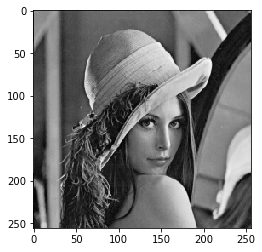

In [2]:
pil_img = Image.open('Images/Lena256.bmp')
img_gray = pil_img.convert('LA')

img = np.array(list(img_gray.getdata(band=0)), float)
img.shape = (img_gray.size[1], img_gray.size[0])
plt.imshow(img, cmap='gray')

In [3]:
img_out = img.copy()

height = img.shape[0]
width = img.shape[1]

gauss = np.array([[1, 1, 2, 2, 2, 1, 1],
                 [1, 2, 2, 4, 2, 2, 1],
                 [2, 2, 4, 8, 4, 2, 2],
                 [2, 4, 8, 16, 8, 4, 2],
                 [2, 2, 4, 8, 4, 2, 2],
                 [1, 2, 2, 4, 2, 2, 1],
                 [1, 1, 2, 2, 2, 1, 1]])

In [4]:
image = np.pad(img, [3,3], mode='constant')
for i in np.arange(height):
    for j in np.arange(width):
        sum = 0
        for k in np.arange(-3,4):
            for l in np.arange(-3,4):
                a = image[i+k][j+l]
                p = gauss[3+k, 3+l]
                sum += (p*a)
        b = sum
    img_out.itemset((i,j), b)

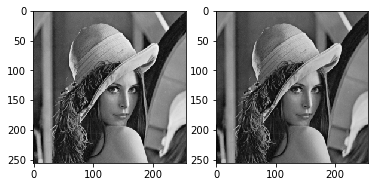

In [5]:
cv2.imwrite('Outputs/filter_gauss.jpg', img_out)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_out, cmap='gray', vmin = 0, vmax = 255)
plt.show()